# IMPORTS

In [ ]:
# Core import statements

import numpy as np
import pandas as pd
import torch
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier



# GET DATA

In [ ]:
# Mount location with data files

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True, timeout_ms=120000)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/AWS/torch_demo/
%ls

/content/gdrive/MyDrive/AWS/torch_demo
data_raw.png  games_details.csv   players.csv
games.csv     model_training.png  teams.csv


In [ ]:
# df_teams = pd.read_csv('teams.csv')
# df_players = pd.read_csv('players.csv')
df_games = pd.read_csv('games.csv')
df_details = pd.read_csv('games_details.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA

In [ ]:
# Set seaborn color palette

color = sns.color_palette

In [ ]:
print(df_details.columns, df_games.columns)

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object') Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')


In [ ]:
df_nba = pd.merge(df_games, df_details, how='inner', on='GAME_ID')

In [ ]:
df_nba.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.76,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.76,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.76,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.76,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.76,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


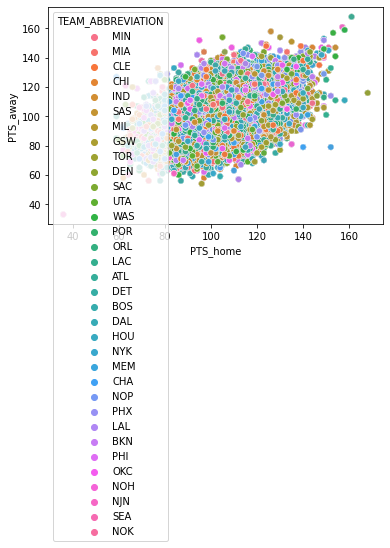

In [ ]:
sns.scatterplot('PTS_home', 'PTS_away', alpha=0.2, hue='TEAM_ABBREVIATION', data=df_nba)

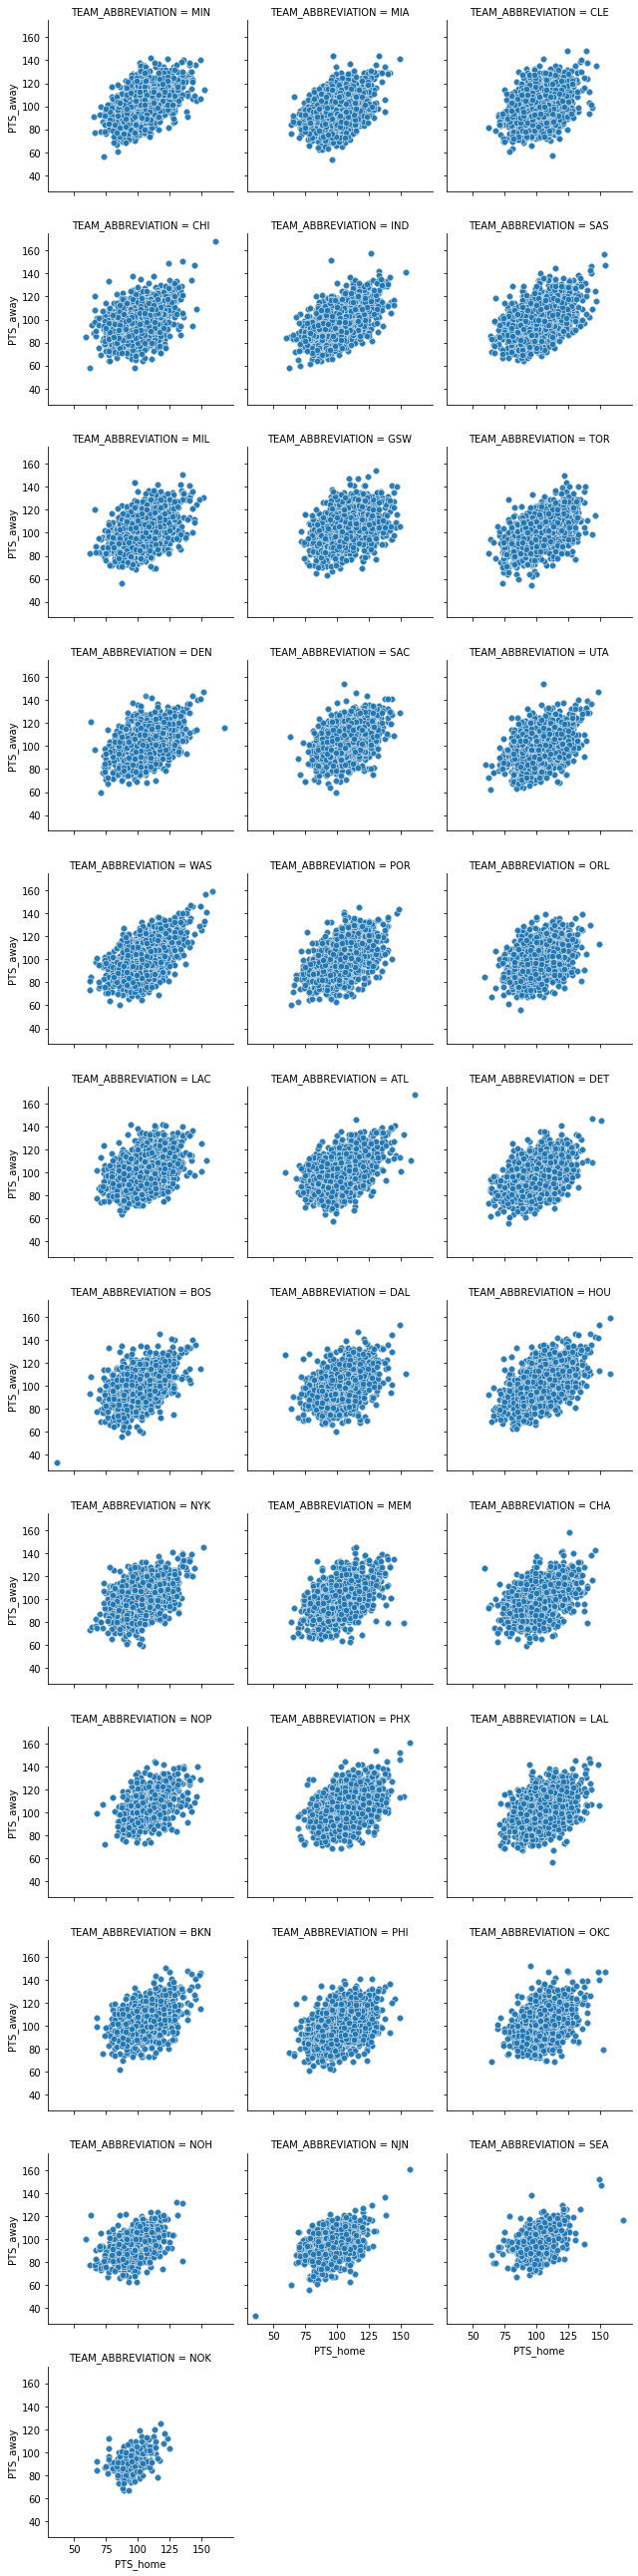

In [ ]:
grid = sns.FacetGrid(data=df_nba, col = 'TEAM_ABBREVIATION', col_wrap = 3)

grid.map(sns.scatterplot, 'PTS_home', 'PTS_away', alpha=0.2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


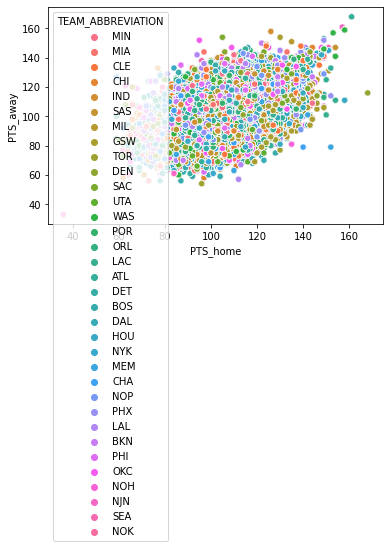

In [ ]:
# scatter_plot = sns.scatterplot('PTS_home', 'PTS_away', alpha=1, hue='TEAM_ABBREVIATION', data=df_nba)
# fig = scatter_plot.get_figure()
# fig.savefig('data_raw.png')    

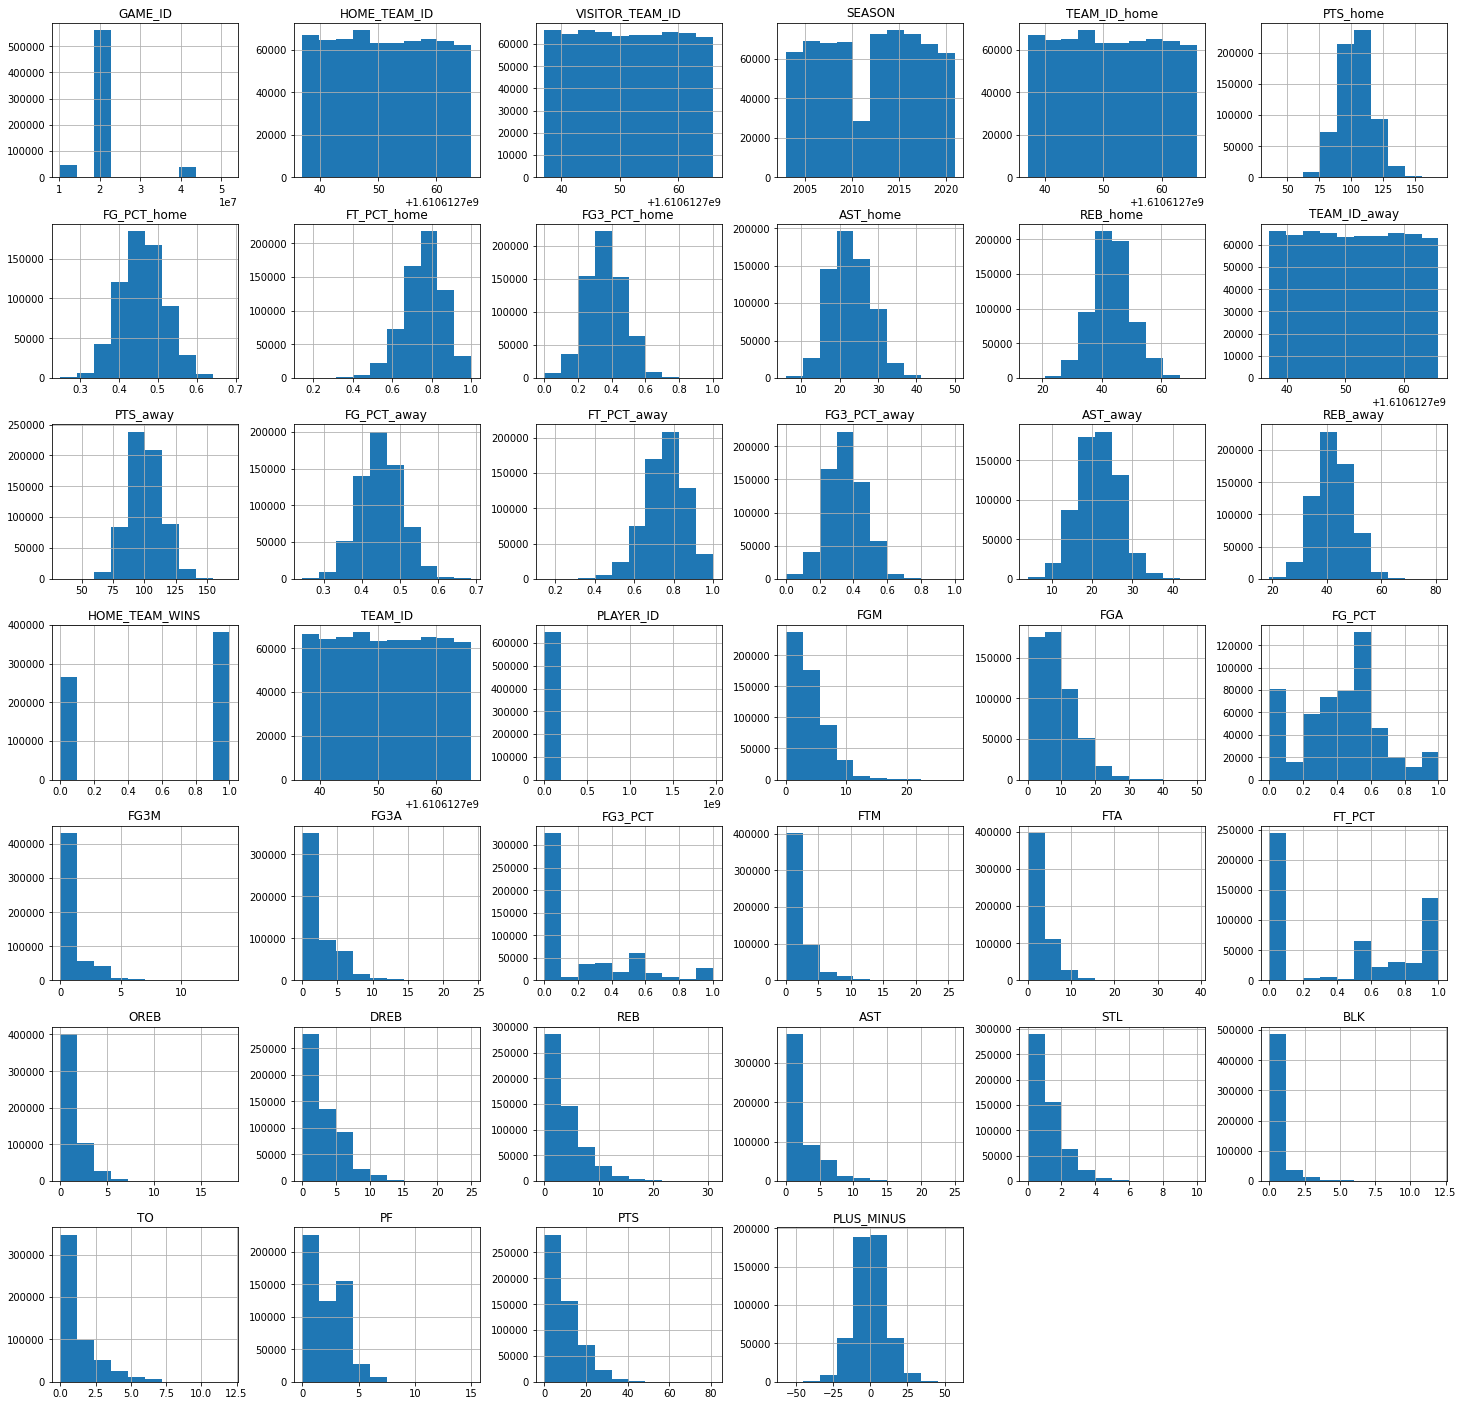

In [ ]:
df_nba.hist(figsize=(25,25));

In [ ]:
# Begin somewhere obvious and look at the point difference of the home team.

(mu, sigma) = norm.fit(df_nba.loc[df_nba['HOME_TEAM_WINS'] == 1, 'PTS_home'])
print('The average number of points scored by the home team when they win is {:0.2f}, \n with a standard deviation of {:0.2f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_nba.loc[df_nba['HOME_TEAM_WINS'] == 0, 'PTS_home'])
print('The average number of points scored by the home team when they do not win is {:0.2f}, \n with a standard deviation of {:0.2f}'.format(mu, sigma))

The average number of points scored by the home team when they win is 107.62, 
 with a standard deviation of 12.13
The average number of points scored by the home team when they do not win is 96.93, 
 with a standard deviation of 12.04


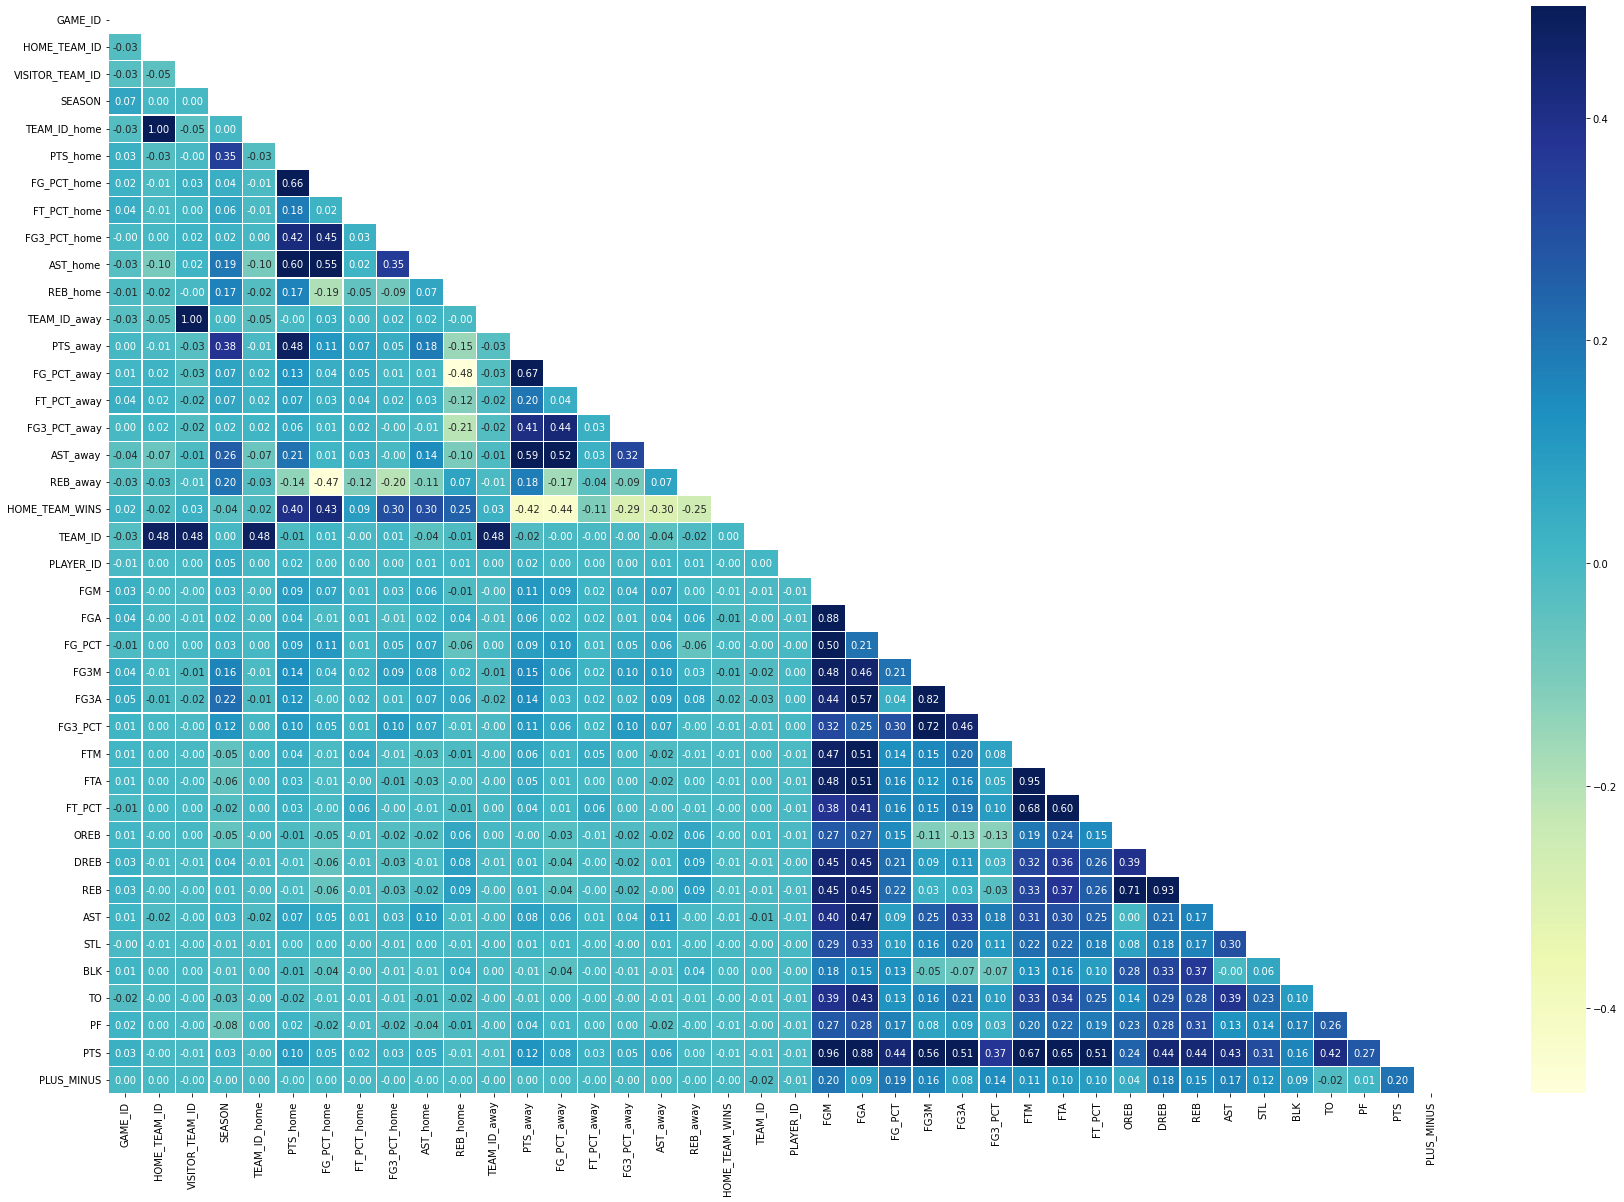

In [ ]:
# Heatmap

df_nba_transpose = df_nba.copy()
correlation = df_nba_transpose.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 20))
sns.heatmap(correlation, vmax=.5, mask=mask, annot=True, fmt='0.2f', linewidths=.2, cmap="YlGnBu");

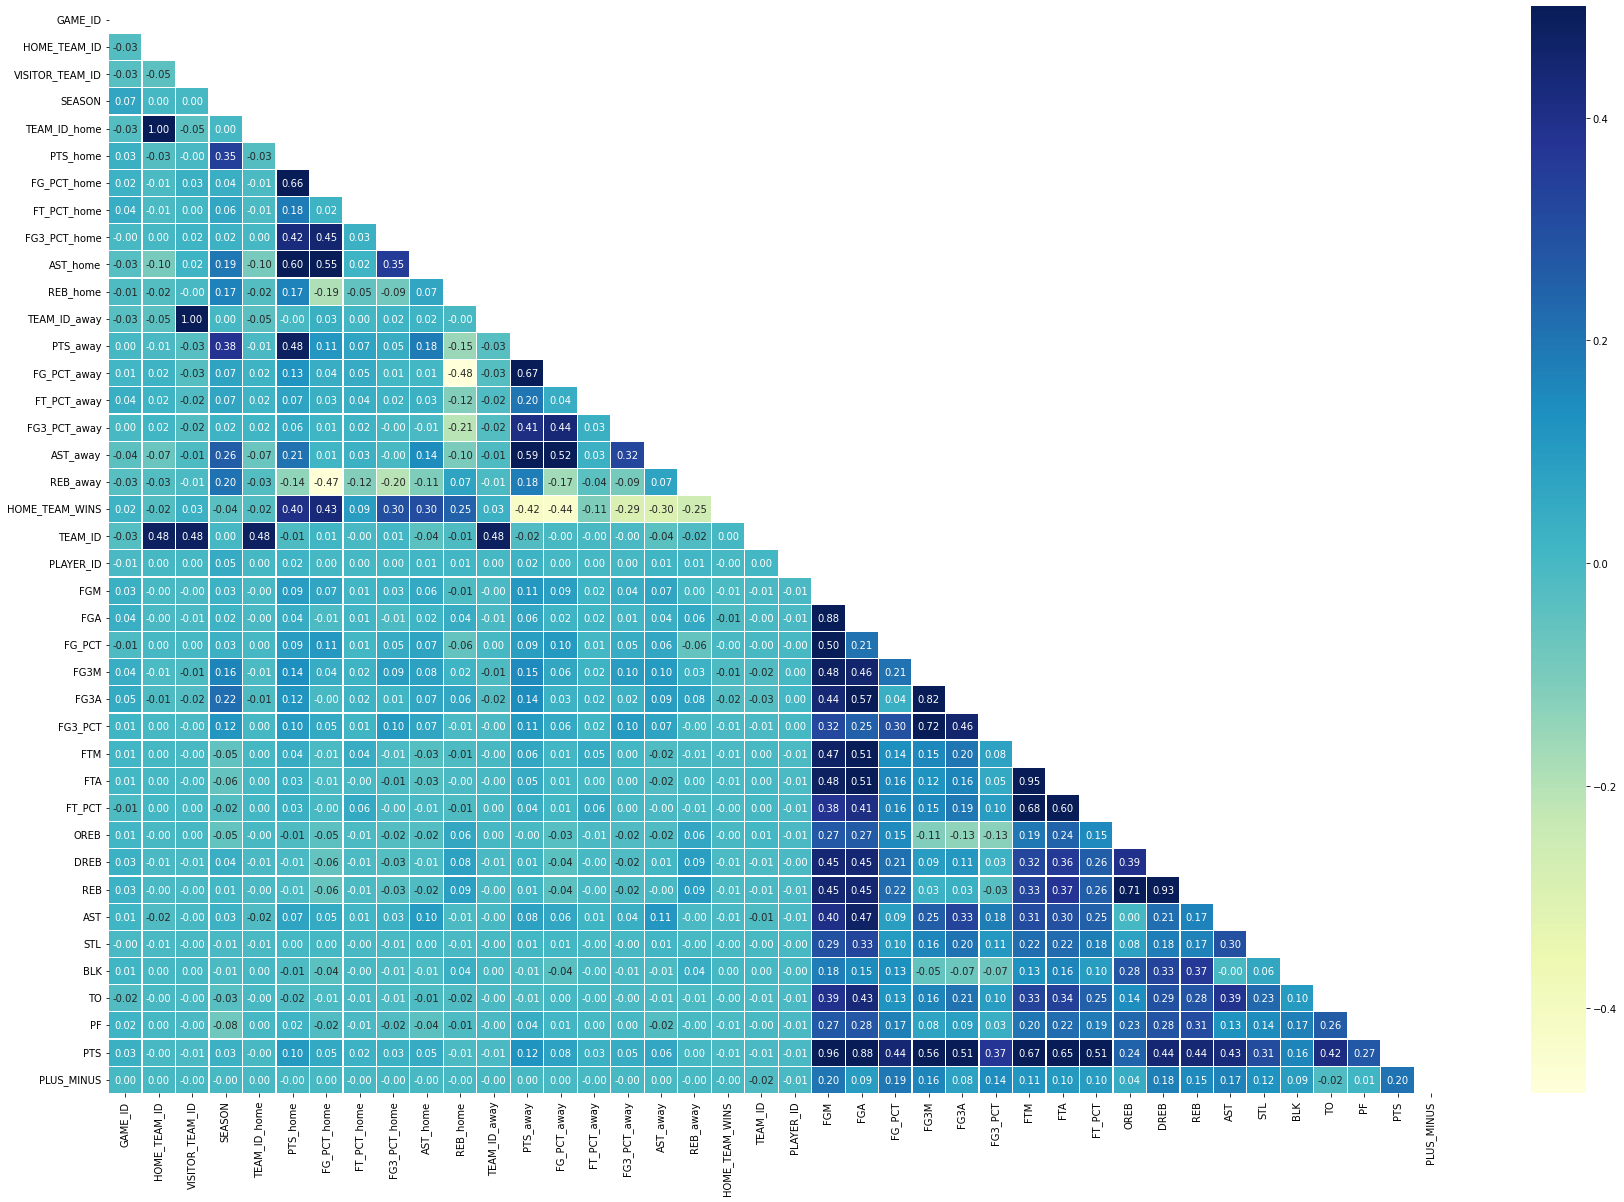

In [ ]:
# plt.figure(figsize=(45, 35))
# heatmap = sns.heatmap(correlation, vmax=.5, mask=mask, annot=True, fmt='0.2f', linewidths=.2, cmap="YlGnBu");
# fig = heatmap.get_figure()
# fig.savefig('heatmap.png')

# PREPROCESSING

In [ ]:
# Data preprocessing

# Encoding
label_encoder = LabelEncoder()
label_encoder_count = 0
for col in df_nba.columns:
    if df_nba[col].dtype == 'object':
        if len(list(df_nba[col].unique())) <= 2:
            label_encoder.fit(df_nba[col])
            df_nba[col] = label_encoder.transform(df_nba[col])
            label_encoder_count += 1

print(f'{label_encoder_count} coulmns have been encoded \n with the final shape {df_nba.shape}')

0 coulmns have been encoded 
 with the final shape (646885, 49)


In [ ]:
# Numerical data only!!

# scale = MinMaxScaler(feature_range=(0, 5))
# nba_col = list(df_nba.columns)
# nba_col.remove('HOME_TEAM_WINS') 


# MODELING

In [ ]:
target = df_nba['HOME_TEAM_WINS'].copy()

trainX, testX, trainy, testy = train_test_split(df_nba, target, test_size = 0.25, random_state = 7, stratify = target)

print('Size of trainX dataset: ', trainX.shape)
print('Size of trainy dataset: ', trainy.shape)
print('Size of testX dataset: ', testX.shape)
print('Size of testy dataset: ', testy.shape)

Size of trainX dataset:  (485163, 49)
Size of trainy dataset:  (485163,)
Size of testX dataset:  (161722, 49)
Size of testy dataset:  (161722,)


In [ ]:
# Model Selection
models = []
# models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier( n_estimators=100, random_state=7)))
# models.append(('SVM', SVC(gamma='auto', random_state=7)))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=7)))
# models.append(('Gaussian NB', GaussianNB()))

acc_results = []
auc_results = []
names = []
columns = [['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']]
df_results = pd.DataFrame(columns)

# Numerical data only!!

# i = 0
# for name, model in models:
#     kfold = model_selection.KFold(n_splits=10)
#     cross_validation_acc_results = model_selection.cross_val_score(
#         model, trainX, trainy, cv=kfold, scoring='accuracy')
#     cross_validation_auc_results = model_selection.cross_val_score(model, trainX, trainy, cv=kfold, scoring='roc_auc')

#     acc_results.append(cross_validation_acc_results)
#     auc_results.append(cross_validation_auc_results)
#     names.append(name)
#     df_results.loc[i] = [name, round(cross_validation_acc_results.mean()*100, 2), round(cross_validation_auc_results.std()*100, 2), round(cross_validation_acc_results.mean()*100, 2), round(cross_validation_auc_results.std()*100, 2)]
#     i += 1

print(df_results)

           0             1            2              3             4
0  Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD


In [ ]:
# Random Forest

random_forest_classifier = RandomForestClassifier(class_weight = "balanced", random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175], 'min_samples_split':[2,4,6,8,10], 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(random_forest_classifier, return_train_score=True, param_grid=param_grid, scoring='roc_auc', cv=10)

grid_fit = grid_obj.fit(trainX, trainy)
random_forest_optimization = grid_fit.best_estimator_


importances = random_forest_optimization.feature_importances_
indices = np.argsort(importances)[::-1]
names = [trainX.columns[i] for i in indices]
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(trainX.shape[1]), importances[indices])
plt.xticks(range(trainX.shape[1]), names, rotation=90)
plt.show()


In [ ]:
importances = random_forest_optimization.feature_importances_
df_paramater_coefficient = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = trainX.columns[i]
    coeff = importances[i]
    df_paramater_coefficient.loc[i] = (feat, coeff)
df_paramater_coefficient.sort_values(by='Coefficient', ascending=False, inplace=True)
df_paramater_coefficient = df_paramater_coefficient.reset_index(drop=True)
df_paramater_coefficient.head(10)

In [ ]:
# Confusion Matrix

confuson_matrix = metrics.confusion_matrix(testy, random_forest_optimization.predict(testX))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);


In [ ]:
# Random Forest heatmap

sns.heatmap(pd.DataFrame(confuson_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ranFor_class = RandomForestClassifier(class_weight = 'balanced', random_state = 7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175, 200], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_depth': [5, 10, 15, 20, 25, 30]}
grid_object = GridSearchCV(ranFor_class, iid = True, return_train_score = True, param_grid = param_grid, scoring = 'roc_auc', cv = 10)

fitGrid = grid_object.fit(trainX, trainy)
ranFor_opt = fitGrid.best_estimator_

print('='*30)
print('best: ' + str(grid_object.best_estimator_))
print('best: ' + str(grid_object.best_params_))
print('best: ', grid_object.best_score_)
print('='*30)

In [ ]:
ranFor_opt.fit(trainX, trainy)
probably2 = ranFor_opt.predict_proba(testX)
probably2 = probably2[:, 1]
ranFor_opt_roc_auc = roc_auc_score(testy, probably2)
print('AUC: {:0.5f}'.format(ranFor_opt_roc_auc))

# PYTORCHed

More Preprocessing

In [ ]:
# seperable = False
# while not seperable:
#     not_win = df_nba.loc[df_nba['HOME_TEAM_WINS'] == 0, 'PTS_home']
#     win = df_nba.loc[df_nba['HOME_TEAM_WINS'] == 1, 'PTS_home']
#     separable = any([not_win[:, k].max() < win[:, k].min() or not_win[:, k].min() > win[:, k].max() for k in range(2)])
# df_nba.loc[df_nba['HOME_TEAM_WINS'] == 1, 'PTS_home']
i = 0
# df_win = pd.DataFrame(columns = ['TEAM_ABBREVIATION', 'PTS_home'])
# for field in list(df_nba['HOME_TEAM_WINS']):
#     team_name = df_nba[(df_nba['TEAM_ABBREVIATION']==field & df_nba['HOME_TEAM_WINS']==1)]
#     df_win.loc[i] = (team_name, field)
#     i += 1
# df_nba.columns.to_series().groupby(df_nba.dtypes).groups

df_nba['TEAM_ABBREVIATION'].groupby(df_nba['HOME_TEAM_WINS']).value_counts()
# df_nba[(df_nba['PTS_home']==104 & df_nba['HOME_TEAM_WINS']==1)]

# df_win.head()



win_labels = np.zeroes(len(df_win))
not_win_labels = np.zeroes(len(df_not_win))

# trainX, testX, trainY, testY = 

HOME_TEAM_WINS  TEAM_ABBREVIATION
0               BOS                  9533
                PHX                  9467
                LAL                  9439
                DAL                  9329
                MIA                  9326
                                     ... 
1               NOP                  5858
                NJN                  5668
                NOH                  5147
                SEA                  3102
                NOK                  1309
Name: TEAM_ABBREVIATION, Length: 68, dtype: int64

PyTorch Model

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).init()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

epochs = 2*(10**5)
input_dim = 2
output_dim = 1
alpha = 0.01

model = LogisticRegression(input_dim, output_dim)
loss_function = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = alpha)

trainX, testX = torch.Tensor(trainX), torch.Tensor(testX)
trainY, testY = torch.Tensor(trainY), torch.Tensor(testY)

losses = []
losses_testing = []
num_iters = []
iter = 0

for epoch in range(int(epochs)):
    x = trainX
    labels = trainY
    optimizer.zero_grad()
    outputs = model(trainX)
    loss = loss_function(torch.squeeze(outputs), labels)

    loss.backward()

    optimizer.step()

    iter += 1
    if iter%10000==0:
        with torch.no_grad():
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(testX))
            loss_test = loss_function(outputs_test, testY)

            predicted_test = outputs_test.round().detach().numpy()
            total_test += testY.size(0)
            correct_test += np.sum(predicted_test == testY.detatch().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_testing.append(loss_test.item())

            total = 0
            correct = 0
            total += trainY.size(0)

            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == trainY.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            num_iters.append(iter)

            print(f"Iteration: {iter}. \n Test - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0.5-b-w[0]*u)/w[1])
    plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)
    plt.xlabel(r'$\boldsymbol{x_1}$',fontsize=16)
    plt.ylabel(r'$\boldsymbol{x_2}$',fontsize=16)
    plt.title(title)
    plt.show()

model_plot(model, trainX, trainY, 'Training')
model_plot(model, testX, testY, 'Testing')    

# GENERAL CONCEPT

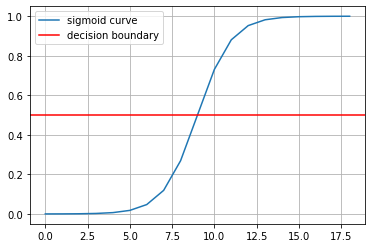

In [ ]:
# stock image generated

import matplotlib.pyplot as plt
import matplotlib

zeta = [x for x in range(10)]
zeta_neg = [-1*x for x in zeta][::-1]
sigmoid_points = zeta_neg + zeta[1:]

def sigmoid(z):
    return 1 / (1 + np.e**-z)

result = []

for point in sigmoid_points:
    result.append(sigmoid(point))

plt.plot(result, label = 'sigmoid curve');
plt.axhline(y = np.max(result)/2, color = 'r', linestyle = '-', label = 'decision boundary')
plt.grid()
legend = plt.legend()
plt.xticks();
plt.yticks();
plt.savefig('model_training.png')